<a href="https://colab.research.google.com/github/valeksandrav/PortfolioProjects/blob/main/Python_APIAutomating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API Test

In [ ]:
#https://coinmarketcap.com/
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  #'limit':'5000',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'fc0dc8ee-3235-4091-94f9-47e1a01b0c56',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-10-06T13:15:48.241Z', 'error_code': 0, 'error_message': None, 'elapsed': 31, 'credit_count': 1, 'notice': None, 'total_count': 8999}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10486, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [ ]:
type(data)

dict

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

<ipython-input-37-e4c4f16a2f18>:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


# Automating the Data Pull

In [ ]:
#import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
def api_runner():
  global df
  url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    #'limit':'5000',
    'limit':'15',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'fc0dc8ee-3235-4091-94f9-47e1a01b0c56',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

  df = pd.json_normalize(data['data'])
  df['timestamp'] = pd.to_datetime('now')
  df

  if not os.path.isfile('/content/gdrive/My Drive/Courses/Data Analyst Bootcamp/CoinmarketcapAPI.csv'):
    df.to_csv('/content/gdrive/My Drive/Courses/Data Analyst Bootcamp/CoinmarketcapAPI.csv', header = 'column_names')
  else:
    df.to_csv('/content/gdrive/My Drive/Courses/Data Analyst Bootcamp/CoinmarketcapAPI.csv', mode = 'a', header = False)


In [ ]:
from time import time
from time import sleep
for i in range(333):
  api_runner()
  print('API Runner comleted')
  sleep(60)
exit()

{'status': {'timestamp': '2023-10-06T13:15:59.513Z', 'error_code': 0, 'error_message': None, 'elapsed': 10, 'credit_count': 1, 'notice': None, 'total_count': 8999}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10486, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

<ipython-input-39-3e6de89a07cf>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


{'status': {'timestamp': '2023-10-06T13:17:00.300Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 8999}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10486, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

<ipython-input-39-3e6de89a07cf>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


KeyboardInterrupt: ignored

In [ ]:
CoinmarketcapAPI = pd.read_csv('/content/gdrive/My Drive/Courses/Data Analyst Bootcamp/CoinmarketcapAPI.csv')

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
CoinmarketcapAPI

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10486,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19505637.00000,19505637.00000,False,NaN,1,NaN,NaN,NaN,2023-10-06T13:12:00.000Z,27373.27328,13275939317.97823,30.23200,-1.29724,-1.61282,1.33861,6.59682,-5.62974,-9.36843,533933132174.74237,49.57870,574838738958.88000,NaN,2023-10-06T13:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 13:13:45.747523
1,1,1027,Ethereum,ETH,ethereum,7490,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120244439.39826,120244439.39826,True,NaN,2,NaN,NaN,NaN,2023-10-06T13:12:00.000Z,1621.61902,5691230741.24932,23.93720,-0.79162,-0.98700,-3.15529,-0.52324,-11.35398,-12.73796,194990670066.74438,18.09060,194990670066.73999,NaN,2023-10-06T13:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 13:13:45.747523
2,2,825,Tether USDt,USDT,tether,63204,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83366897433.59711,86425711834.21460,True,NaN,3,NaN,NaN,NaN,2023-10-06T13:12:00.000Z,1.00035,20394335366.94182,18.73940,0.00662,0.02953,0.05127,0.09657,0.23406,0.02099,83396106513.61400,7.73980,86455992624.42999,NaN,2023-10-06T13:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-06 13:13:45.747523
3,3,1839,BNB,BNB,bnb,1660,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153845973.18099,153845973.18099,False,NaN,4,NaN,NaN,NaN,2023-10-06T13:12:00.000Z,211.17185,351604329.96485,6.36860,-0.42408,-0.53483,-2.39944,-1.65460,-12.65172,-10.68260,32487938016.38076,3.01670,32487938016.38000,NaN,2023-10-06T13:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 13:13:45.747523
4,4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53312364216.00000,99988397127.00000,False,NaN,5,NaN,NaN,NaN,2023-10-06T13:12:00.000Z,0.51974,770752477.11772,-16.86160,-0.33438,-0.63835,-2.84892,3.69971,-15.86905,11.31322,27708611866.82410,2.57070,51974081949.47000,NaN,2023-10-06T13:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 13:13:45.747523
5,5,3408,USDC,USDC,usd-coin,14326,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25231180019.99701,25231180019.99701,False,NaN,6,NaN,NaN,NaN,2023-10-06T13:12:00.000Z,1.00019,2824304012.99005,21.23680,0.00742,0.01995,0.01492,0.02385,0.02127,0.01517,25236061244.65924,2.34150,25236061244.66000,NaN,2023-10-06T13:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-06 13:13:45.747523
6,6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,413568777.81760,559158742.62510,True,NaN,7,NaN,NaN,NaN,2023-10-06T13:12:00.000Z,22.92163,409324756.98583,13.81490,-1.09704,-1.51435,13.64753,15.83194,-0.34130,4.90209,9479668989.50225,0.87950,12816827761.14000,NaN,2023-10-06T13:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 13:13:45.747523
7,7,2010,Cardano,ADA,cardano,942,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35144660648.94400,36229014789.87600,False,NaN,8,NaN,NaN,NaN,2023-10-06T13:12:00.000Z,0.26236,108546320.57117,13.01120,-0.59126,0.73931,3.74682,2.51379,-10.52494,-8.25092,9220427427.82545,0.85570,11806038999.69000,NaN,2023-10-06T13:12:00.000

# Transforming and Visualizing Data

In [ ]:
CoinmarketcapAVG = CoinmarketcapAPI.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

In [ ]:
CoinmarketcapStack = CoinmarketcapAVG.stack().to_frame(name = 'values')

In [ ]:
CoinmarketcapStack.count()

values    90
dtype: int64

In [ ]:
index = pd.Index(range(90))
CoinmarketcapIndex = CoinmarketcapStack.reset_index()

In [ ]:
Coinmarketcap = CoinmarketcapIndex.rename(columns = {'level_1': 'percent_change'})

In [ ]:
Coinmarketcap

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-1.25139
1,Bitcoin,quote.USD.percent_change_24h,-1.60190
2,Bitcoin,quote.USD.percent_change_7d,1.41069
3,Bitcoin,quote.USD.percent_change_30d,6.65729
4,Bitcoin,quote.USD.percent_change_60d,-5.57536
...,...,...,...
85,Litecoin,quote.USD.percent_change_24h,0.20740
86,Litecoin,quote.USD.percent_change_7d,-1.66376
87,Litecoin,quote.USD.percent_change_30d,2.88501
88,Litecoin,quote.USD.percent_change_60d,-21.59098


In [ ]:
Coinmarketcap['percent_change'] = Coinmarketcap['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])

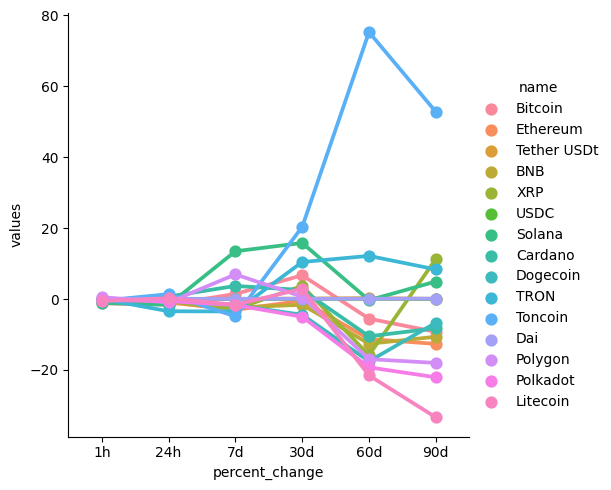

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = Coinmarketcap, kind = 'point')

In [ ]:
QuoteUsdPrice = CoinmarketcapAPI[['name', 'quote.USD.price', 'timestamp']]

In [ ]:
QuoteUsdPriceBitcoin = QuoteUsdPrice.query("name == 'Bitcoin'")

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

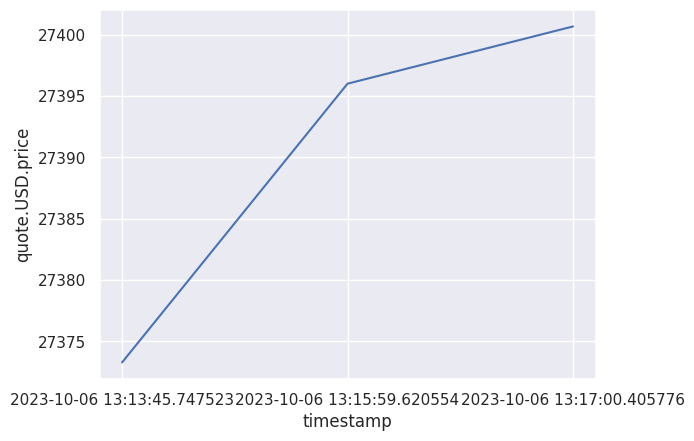

In [ ]:
sns.set_theme(style = 'darkgrid')
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = QuoteUsdPriceBitcoin)